In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

### Importing data

In [102]:
df = pd.read_csv('fake_reg.csv')
df

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531
...,...,...,...
995,476.526078,1000.018988,999.672732
996,457.313186,998.855379,1000.020026
997,456.720992,1001.451646,998.847606
998,403.315576,1000.771023,998.562851


### Creating a pairplot of the data frame

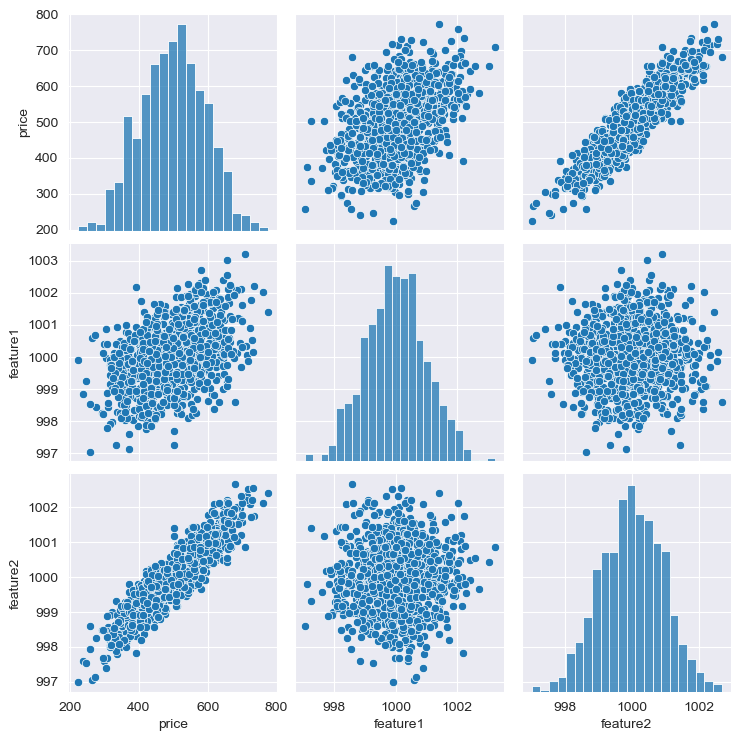

In [103]:
sns.pairplot(df)

### Train test split

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X = df[['feature1','feature2']].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling/normalizing the data

In [106]:
from sklearn.preprocessing import MinMaxScaler

In [107]:
scaler = MinMaxScaler()

In [108]:
scaler.fit(X_train)

MinMaxScaler()

In [109]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Creating the model using Keras

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [110]:
X_train.shape

(700, 2)

In [76]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))


### Creating the optimizer and the loss function

Keep in mind what kind of problem you are trying to solve:

#### For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#### For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

In [77]:
model.compile(optimizer='rmsprop',loss='mse')

### Training the model

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

Sample: one element of a dataset.

    Example: one image is a sample in a convolutional network

    Example: one audio file is a sample for a speech recognition model

Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).

Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.

When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.

Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [78]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 256905.4219
Epoch 2/250
22/22 [==============================] - 0s 3ms/step - loss: 256762.1875
Epoch 3/250
22/22 [==============================] - 0s 3ms/step - loss: 256672.8906
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 256624.2500
Epoch 5/250
22/22 [==============================] - 0s 3ms/step - loss: 256582.4531
Epoch 6/250
22/22 [==============================] - 0s 3ms/step - loss: 256539.1094
Epoch 7/250
22/22 [==============================] - 0s 2ms/step - loss: 256495.2656
Epoch 8/250
22/22 [==============================] - 0s 3ms/step - loss: 256448.3438
Epoch 9/250
22/22 [==============================] - 0s 3ms/step - loss: 256384.1406
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 256294.3281
Epoch 11/250
22/22 [==============================] - 0s 3ms/step - loss: 256199.4062
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 3ms/step - loss: 33.2387
Epoch 194/250
22/22 [==============================] - 0s 3ms/step - loss: 31.4907
Epoch 195/250
22/22 [==============================] - 0s 3ms/step - loss: 30.2499
Epoch 196/250
22/22 [==============================] - 0s 3ms/step - loss: 29.4881
Epoch 197/250
22/22 [==============================] - 0s 4ms/step - loss: 28.4292
Epoch 198/250
22/22 [==============================] - 0s 4ms/step - loss: 28.2791
Epoch 199/250
22/22 [==============================] - 0s 3ms/step - loss: 26.7483
Epoch 200/250
22/22 [==============================] - 0s 3ms/step - loss: 26.8618
Epoch 201/250
22/22 [==============================] - 0s 4ms/step - loss: 26.1658
Epoch 202/250
22/22 [==============================] - 0s 5ms/step - loss: 26.3128
Epoch 203/250
22/22 [==============================] - 0s 3ms/step - loss: 25.8810
Epoch 204/250
22/22 [==============================] - 0s 3ms/step - loss: 25.3403
Epoch 205/250
22/2

### Checking the historical losses

In [79]:
df_mh = pd.DataFrame(model.history.history)
df_mh

,loss
0,256905.421875
1,256762.187500
2,256672.890625
3,256624.250000
4,256582.453125
...,...
245,24.298990
246,24.406450
247,24.041933
248,24.364691


<Axes: >

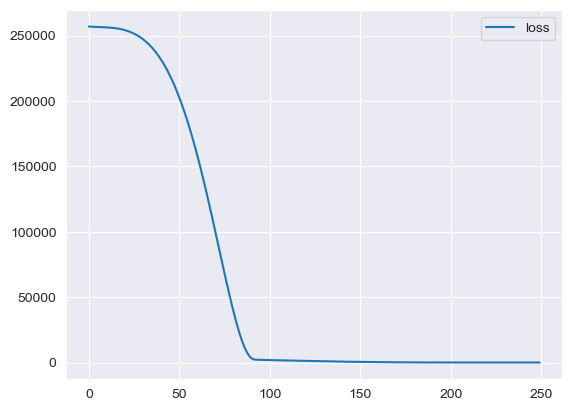

In [80]:
df_mh.plot()

### Testing the model in a new data set

In [81]:
model.evaluate(X_test,y_test,verbose=0)

25.096336364746094

In [82]:
model.evaluate(X_train,y_train,verbose=0)

24.44741439819336

### Getting predictions

In [83]:
pred = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


### Comparing the pred with y_test

In [84]:
pred_df = pd.DataFrame(y_test,columns=['True Y'])

In [85]:
pred_df['pred'] = pred

In [86]:
pred_df

,True Y,pred
0,402.296319,404.807251
1,624.156198,622.962708
2,582.455066,591.570557
3,578.588606,571.666687
4,371.224104,366.141602
...,...,...
295,525.704657,528.504822
296,502.909473,514.746338
297,612.727910,609.081726
298,417.569725,416.471924


### Ploting the label and predictions

<Axes: xlabel='pred', ylabel='True Y'>

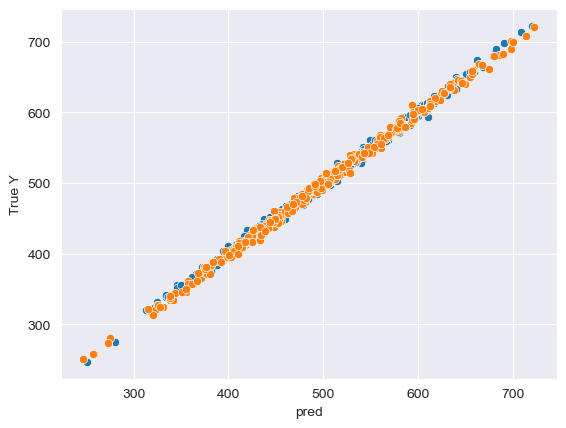

In [89]:
sns.scatterplot(y='True Y',x='pred',data=pred_df)
sns.scatterplot(x='True Y',y='pred',data=pred_df)

### Getting mean absolute error, mean squared error and root mean squared error

Analysing the mean absolute error and the mean of the original data frame you can conclude that the MAB is less than 
1% of the mean value, what means that is a good prediction

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [91]:
mean_absolute_error(y_test,pred)

4.009941975077195

In [92]:
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [93]:
mean_squared_error(y_test,pred)

25.09633910623738

In [94]:
### Root mean squared error
mean_squared_error(y_test,pred)**0.5

5.009624647240288

### Testing the model with a new created value

In [95]:
new_val = [[998,1000]]
new_val = scaler.transform(new_val)
model.predict(new_val)

1/1 [==============================] - 0s 59ms/step


array([[419.1894]], dtype=float32)

### Saving the model

In [96]:
from tensorflow.keras.models import load_model

In [97]:
model.save('values_predictor.h5')

### Using model in a new notebook

In [98]:
new_model = load_model('values_predictor.h5')

In [99]:
new_val2 = [[1000,998]]
new_val2 = scaler.transform(new_val)

In [100]:
new_model.predict(new_val2)

1/1 [==============================] - 0s 158ms/step


array([[1842.7474]], dtype=float32)